In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
sirens = gpd.read_file('Tornado Siren Locations_20240413.geojson')

In [3]:
print(sirens.crs)
sirens.head()

EPSG:4326


,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654)
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229)
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259)
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049)
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935)


In [4]:
sirens['lng']  = sirens['geometry'].x
sirens['lat']  = sirens['geometry'].y

In [5]:
sirens.head()

,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lng,lat
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),-86.776981,36.166543
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),-86.799817,36.162290
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259),-86.831647,36.252586
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049),-86.646603,36.050490
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935),-86.933764,36.069350


In [6]:
zipcodes = gpd.read_file('zipcodes.geojson')
print(zipcodes.crs)
zipcodes.sort_values('zip', ascending = True)
zipcodes.head()

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [7]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

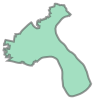

In [8]:
zipcodes.loc[0, 'geometry']

<Axes: >

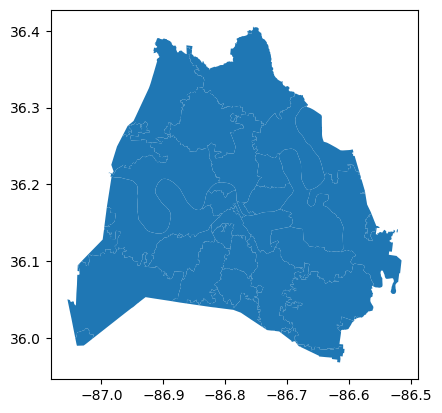

In [9]:
zipcodes.plot()

<Axes: >

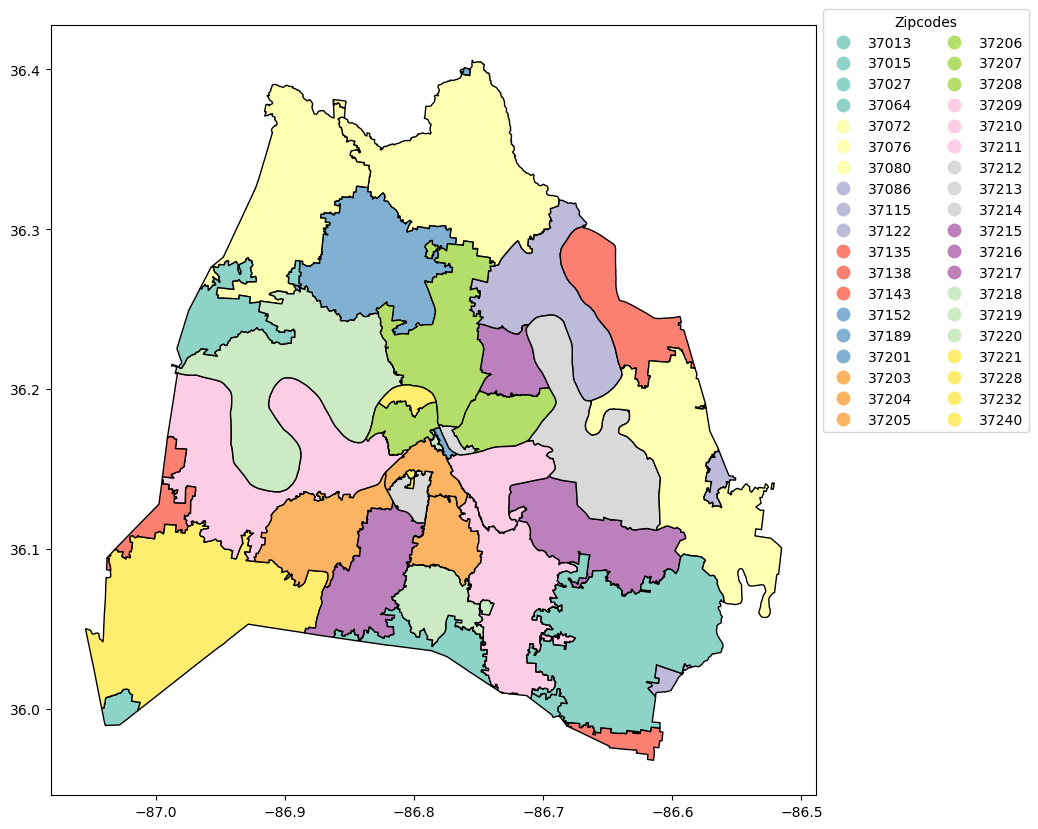

In [10]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')

In [11]:
sirens.head()

,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lng,lat
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),-86.776981,36.166543
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),-86.799817,36.162290
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259),-86.831647,36.252586
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049),-86.646603,36.050490
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935),-86.933764,36.069350


In [12]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [13]:
type(sirens)

geopandas.geodataframe.GeoDataFrame

In [14]:
print(zipcodes.crs)

EPSG:4326


In [15]:
print(sirens.crs)

EPSG:4326


In [16]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [17]:
zips = zipcodes[['po_name', 'geometry']]

In [18]:
zips.head(10)

,po_name,geometry
0,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,NASHVILLE,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,NASHVILLE,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,BRENTWOOD,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,FRANKLIN,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,JOELTON,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,NASHVILLE,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,GOODLETTSVILLE,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,NASHVILLE,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


In [19]:
siren_zips = gpd.sjoin(sirens, zips, predicate = 'within')

In [20]:
siren_zips.head()

,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lng,lat,index_right,po_name
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),-86.776981,36.166543,36,NASHVILLE
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),-86.799817,36.162290,35,NASHVILLE
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259),-86.831647,36.252586,18,WHITES CREEK
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049),-86.646603,36.050490,51,ANTIOCH
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935),-86.933764,36.069350,7,NASHVILLE


In [21]:
siren_zips['zip'].value_counts()

zip
37013    9
37211    9
37207    8
37214    6
37217    5
37215    5
37076    5
37203    5
37205    5
37209    5
37206    4
37072    4
37210    4
37218    4
37221    4
37115    4
37204    3
37208    3
37220    3
37216    3
37138    3
37027    2
37201    2
37189    2
37015    1
37228    1
37080    1
37212    1
Name: count, dtype: int64

In [22]:
zip37211 = siren_zips.loc[siren_zips['zip'] == '37211']

In [23]:
zip37211

,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lng,lat,index_right,po_name
7,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,McMurray Middle School,520 MCMURRAY DR,Eclipse 8,50,POINT (-86.72284 36.05733),-86.722841,36.057330,49,NASHVILLE
10,NASHVILLE,37211,PARK OR RECREATION,4400,Grassmere Park,3777 NOLENSVILLE PIKE,Eclipse 8,50,POINT (-86.73390 36.08978),-86.733904,36.089776,49,NASHVILLE
19,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,Haywood Elementary,3790 TURLEY DR,Eclipse 8,50,POINT (-86.70863 36.07470),-86.708628,36.074698,49,NASHVILLE
52,NASHVILLE,37211,NURSING HOME,4400,Ezell Road Park,5135 HARDING PL,Eclipse 8,50,POINT (-86.68602 36.09094),-86.686024,36.090942,49,NASHVILLE
55,NASHVILLE,37211,VACANT COMMERCIAL LAND,4400,Thompson Lane & Mill Creek,431 E THOMPSON LN,Eclipse 8,50,POINT (-86.71933 36.11694),-86.719329,36.116939,49,NASHVILLE
63,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,Shayne Elementary,6211 NOLENSVILLE PIKE,Eclipse 8,50,POINT (-86.71113 36.02003),-86.711132,36.020026,49,NASHVILLE
66,NASHVILLE,37211,FIRE STATION,14700,Fire Station 10,15530 OLD HICKORY BLVD,508,50,POINT (-86.74065 36.04012),-86.740650,36.040116,49,NASHVILLE
75,NASHVILLE,37211,PARK OR RECREATION,4400,Paragon Mills Park,465 BENITA DR,Eclipse 8,50,POINT (-86.71505 36.09466),-86.715046,36.094660,49,NASHVILLE
107,NASHVILLE,37211,PARK OR RECREATION,4400,William Whitfield Park,5101 EDMONDSON PIKE,Eclipse 8,50,POINT (-86.73852 36.06590),-86.738525,36.065901,49,NASHVILLE


In [24]:
zip37211.shape

(9, 13)

In [25]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [26]:
polygon37211 = zipcodes.loc[zipcodes['zip'] == '37211']

In [27]:
polygon37211

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328,"MULTIPOLYGON (((-86.75696 36.13189, -86.75693 ..."


In [28]:
polygon37211.shape

(1, 6)

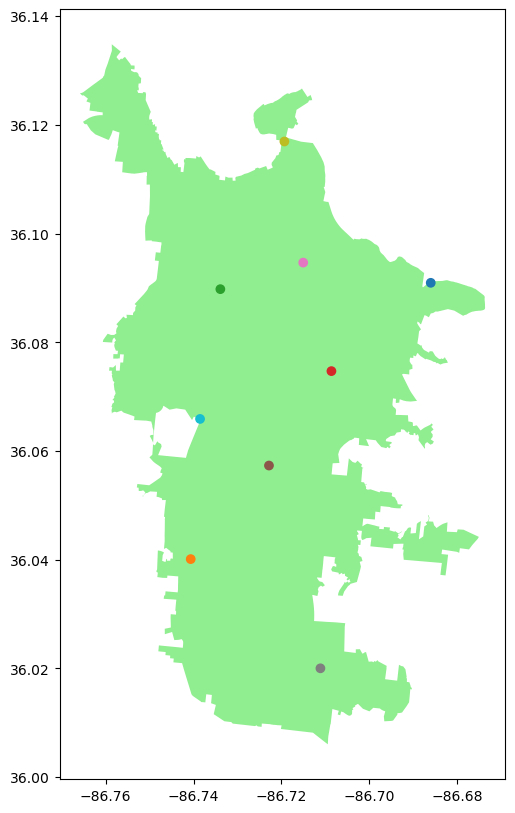

In [29]:
ax  = polygon37211.plot(figsize = (8, 10), color =  'lightgreen')
zip37211.plot(ax = ax, column = 'site_name');
plt.show();

In [30]:
polygon37211['geometry'].centroid

C:\Users\berat\AppData\Local\Temp\ipykernel_23228\2006768019.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37211['geometry'].centroid


49    POINT (-86.72308 36.06711)
dtype: geometry

In [31]:
center = polygon37211['geometry'].centroid[49]
print(center)

POINT (-86.72307880301152 36.06711142916258)


C:\Users\berat\AppData\Local\Temp\ipykernel_23228\2953076142.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37211['geometry'].centroid[49]


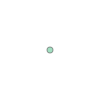

In [32]:
center

In [33]:
center.x

-86.72307880301152

In [34]:
center.y

36.06711142916258

In [35]:
area_center = [center.y, center.x]
print(area_center)

[36.06711142916258, -86.72307880301152]


In [36]:
map_37211 = folium.Map(location = area_center, zoom_start = 12)
map_37211

In [37]:
test = zip37211

In [38]:
test

,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lng,lat,index_right,po_name
7,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,McMurray Middle School,520 MCMURRAY DR,Eclipse 8,50,POINT (-86.72284 36.05733),-86.722841,36.057330,49,NASHVILLE
10,NASHVILLE,37211,PARK OR RECREATION,4400,Grassmere Park,3777 NOLENSVILLE PIKE,Eclipse 8,50,POINT (-86.73390 36.08978),-86.733904,36.089776,49,NASHVILLE
19,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,Haywood Elementary,3790 TURLEY DR,Eclipse 8,50,POINT (-86.70863 36.07470),-86.708628,36.074698,49,NASHVILLE
52,NASHVILLE,37211,NURSING HOME,4400,Ezell Road Park,5135 HARDING PL,Eclipse 8,50,POINT (-86.68602 36.09094),-86.686024,36.090942,49,NASHVILLE
55,NASHVILLE,37211,VACANT COMMERCIAL LAND,4400,Thompson Lane & Mill Creek,431 E THOMPSON LN,Eclipse 8,50,POINT (-86.71933 36.11694),-86.719329,36.116939,49,NASHVILLE
63,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,Shayne Elementary,6211 NOLENSVILLE PIKE,Eclipse 8,50,POINT (-86.71113 36.02003),-86.711132,36.020026,49,NASHVILLE
66,NASHVILLE,37211,FIRE STATION,14700,Fire Station 10,15530 OLD HICKORY BLVD,508,50,POINT (-86.74065 36.04012),-86.740650,36.040116,49,NASHVILLE
75,NASHVILLE,37211,PARK OR RECREATION,4400,Paragon Mills Park,465 BENITA DR,Eclipse 8,50,POINT (-86.71505 36.09466),-86.715046,36.094660,49,NASHVILLE
107,NASHVILLE,37211,PARK OR RECREATION,4400,William Whitfield Park,5101 EDMONDSON PIKE,Eclipse 8,50,POINT (-86.73852 36.06590),-86.738525,36.065901,49,NASHVILLE


In [39]:
test.iterrows()

<generator object DataFrame.iterrows at 0x0000018555B42CE0>

In [40]:
for index, values in test.iterrows():
    print(index)

7
10
19
52
55
63
66
75
107


In [41]:
for index, values in test.iterrows():
    print('-------------THIS is the Start of the row:----------')
    print(values)
    print('-------------THIS is the End of the row.------------', '\n\n')

-------------THIS is the Start of the row:----------
city                                      NASHVILLE
zip                                           37211
land_use_description              SCHOOL OR COLLEGE
radius                                         4400
site_name                    McMurray Middle School
address                             520 MCMURRAY DR
siren                                     Eclipse 8
mounted_height                                   50
geometry                POINT (-86.722841 36.05733)
lng                                      -86.722841
lat                                        36.05733
index_right                                      49
po_name                                   NASHVILLE
Name: 7, dtype: object
-------------THIS is the End of the row.------------ 


-------------THIS is the Start of the row:----------
city                                       NASHVILLE
zip                                            37211
land_use_description             

In [42]:
i = 0
for row_index, row_values in zip37211.iterrows():
    if i <9: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 7
values are:
 
city                                      NASHVILLE
zip                                           37211
land_use_description              SCHOOL OR COLLEGE
radius                                         4400
site_name                    McMurray Middle School
address                             520 MCMURRAY DR
siren                                     Eclipse 8
mounted_height                                   50
geometry                POINT (-86.722841 36.05733)
lng                                      -86.722841
lat                                        36.05733
index_right                                      49
po_name                                   NASHVILLE
Name: 7, dtype: object
------------------------- 
index is 10
values are:
 
city                                       NASHVILLE
zip                                            37211
land_use_description              PARK OR RECREATION
radius                                          4400
site_name  

In [43]:
folium.GeoJson(polygon37211).add_to(map_37211)
map_37211

In [44]:
for row_index, row_values in zip37211.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['site_name'])
    icon = folium.Icon(color = 'red', icon = 'bullhorn', prefix = 'fa')
    
    marker = folium.Marker(
        location  = loc,
        popup = pop,
        icon = icon
        )
    
    marker.add_to(map_37211)
#map_37211.save('../maps/map37211.html')
map_37211

In [45]:
folium.Map?

In [46]:
cluster_map_37211 = folium.Map(location = area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_37211)

folium.GeoJson(polygon37211).add_to(cluster_map_37211)

for row_index, row_values in zip37211.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['site_name'])
    icon = folium.Icon(color = 'red', icon = 'bullhorn', prefix = 'fa')
    
    marker = folium.Marker(
        location  = loc,
        popup = pop,
        icon = icon
        )

    marker.add_to(marker_cluster)

#cluster_map_37211.save('../maps/cluster37211.html')

cluster_map_37211

In [47]:
#draw our zip code area: 37207
map_37211 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37211).add_to(map_37211)

#create a list of locations and pass them to FastMarkerCluster()
locations = zip37211[['lat', 'lng']].values.tolist()
map_37211.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37211